# DS 3000 - Assignment [5]

**Student Name**: [Ivan Ng]

**Date**: [2/12/2024]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

Load the data directly from the url into a dataframe. Here is the direct link to the data: https://data.ny.gov/api/views/ngbt-9rwf/rows.csvLinks to an external site.


In [1]:
import pandas as pd

# URL of the data
url = "https://data.ny.gov/api/views/ngbt-9rwf/rows.csv"

# Load data into a dataframe
df = pd.read_csv(url)

# Display the first few rows of the dataframe to verify that the data was loaded correctly
df.head()

,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2007,Albany,Crisis,Medical Managed Detoxification,Under 18,Heroin,4
1,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,All Others,2
2,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Other Opioids,6
3,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Heroin,132
4,2007,Albany,Crisis,Medical Managed Detoxification,18 through 24,Alcohol,35


## Question 2: 
Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed) and perform at least one additional data preparation step. 


In [2]:
# Inspect data types
print(df.dtypes)

Year                           int64
County of Program Location    object
Program Category              object
Service Type                  object
Age Group                     object
Primary Substance Group       object
Admissions                     int64
dtype: object


In [3]:
# Inspect missing data
# Check for null values and count them per column
null_values_per_column = df.isnull().sum()

# Display the count of null values per column
print(null_values_per_column)

Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       1
Admissions                    0
dtype: int64


In [4]:
# Remove singular row
df.dropna(inplace=True)
print(df.isnull().sum())

Year                          0
County of Program Location    0
Program Category              0
Service Type                  0
Age Group                     0
Primary Substance Group       0
Admissions                    0
dtype: int64


In [5]:
# Convert specified columns to strings
df['County of Program Location'] = df['County of Program Location'].apply(str)
df['Program Category'] = df['Program Category'].apply(str)
df['Service Type'] = df['Service Type'].apply(str)
df['Primary Substance Group'] = df['Primary Substance Group'].apply(str)

# Data types are now correct
print(df.dtypes)

Year                           int64
County of Program Location    object
Program Category              object
Service Type                  object
Age Group                     object
Primary Substance Group       object
Admissions                     int64
dtype: object


## Question 3: 
Visualize the distribution of Age Groups, Program Category, Primary Substance Group, and Admissions. Ensure that you choose an appropriate graph based on the type of data. Explain each chart.


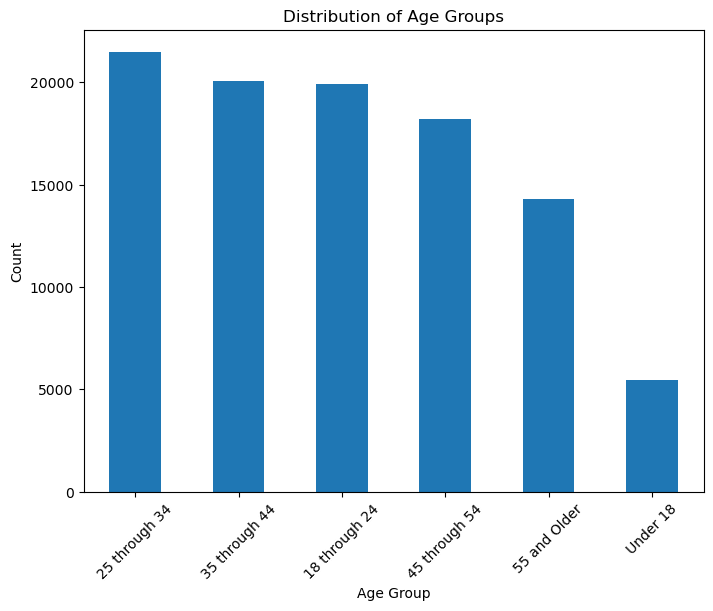

In [6]:
import matplotlib.pyplot as plt

# Plot for Age Group
plt.figure(figsize=(8, 6))
df['Age Group'].value_counts().plot(kind='bar')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar graph is good because there are a limited amount of age groups
# The names of the bars are rotated to make them less tight to fit next to each other

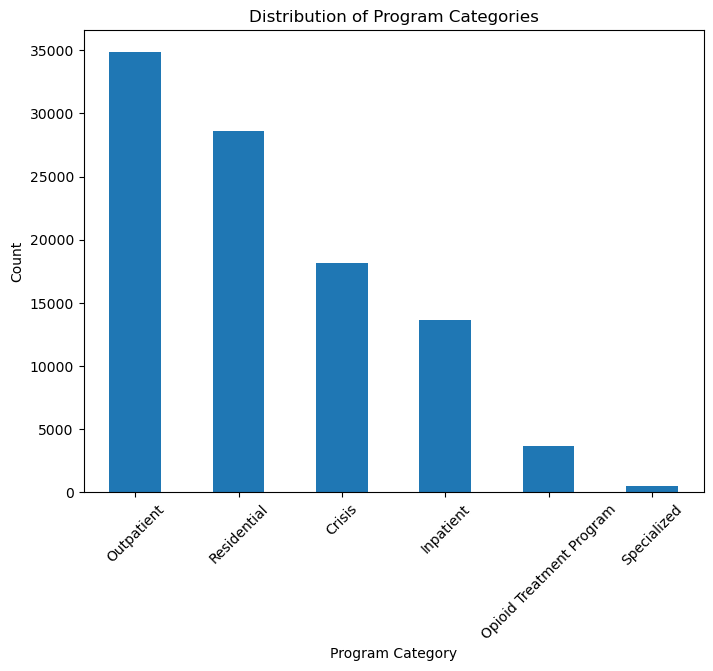

In [7]:
# Plot for Program Category
plt.figure(figsize=(8, 6))
df['Program Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Program Categories')
plt.xlabel('Program Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bar graph is good because there are a limited amount of programs
# The names of the bars are rotated to make them less tight to fit next to each other
# specifically Opioid Treatment Program

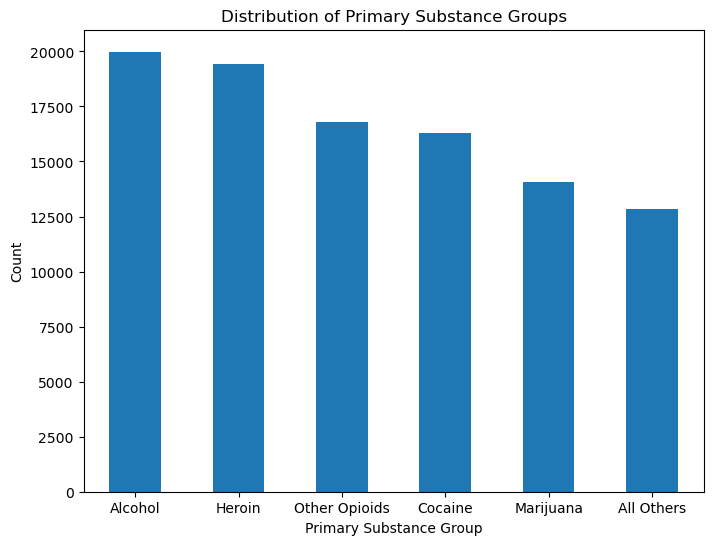

In [8]:
# Plot for Primary Substance Group
plt.figure(figsize=(8, 6))
df['Primary Substance Group'].value_counts().plot(kind='bar')
plt.title('Distribution of Primary Substance Groups')
plt.xlabel('Primary Substance Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar graph because there are only 6 groups of substsances
# No need to rotate x acis groups to fit names

## Question 4: 
Create a function called annualAdmissions() that calculates the total number of reported admissions that transpired each year, for the entire state of NY and display the results using a line chart. Annotate the chart to show the year with the highest number of admissions.
Execute the function in a new cell. Explain the chart and discuss any patterns or trends that you have observed over time.

In [9]:
def annualAdmissions(data):
    # Group data by year and calculate total admissions for each year
    yearly_admissions = data.groupby('Year')['Admissions'].sum()
    
    # Find the year with the highest number of admissions
    max_admissions_year = yearly_admissions.idxmax()
    max_admissions = yearly_admissions.max()
    
    # Plotting the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_admissions.index, yearly_admissions.values, marker='o')
    
    # Annotate the chart to show the year with the highest number of admissions
    plt.annotate(f'Max Admissions: {max_admissions} ({max_admissions_year})', 
                 xy=(max_admissions_year, max_admissions-1000), 
                 xytext=(max_admissions_year-2, max_admissions-20000),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10)
    
    # Set the chart title and labels
    plt.title('Annual Admissions in the State of New York')
    plt.xlabel('Year')
    plt.ylabel('Total Admissions')
    
    # Show the plot
    plt.show()

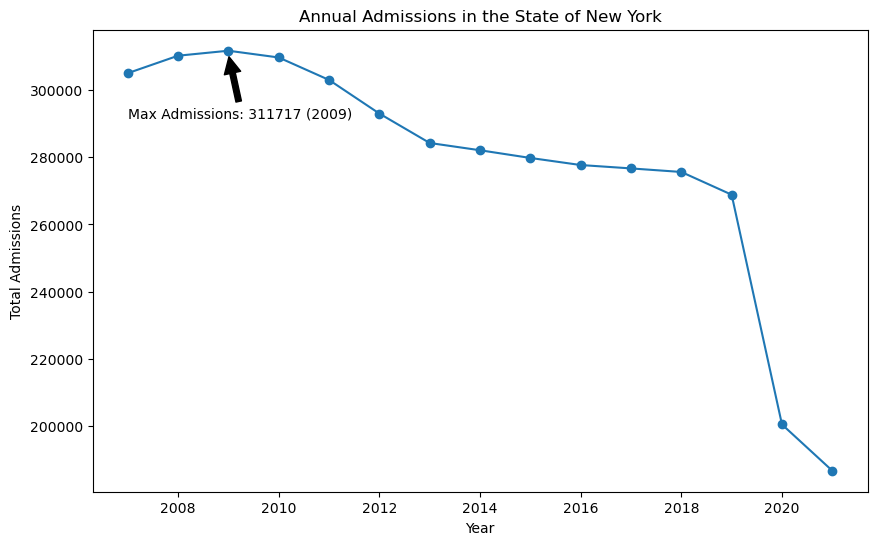

In [10]:
annualAdmissions(df)

In [11]:
# Firstly, the patterns of the graph:
# The graph reaches its peak in 2009
# Afterwich it decreases a subinstantial amount until 2013
# Where it decreases more slowly until about 2019
# WHere it experiences a massive drop
# Possible conjectures I personally have is that the 2008 financial crisis
# Caused many people to lean on substances in cope and afterwards the recovery
# Lowered it until Covid-19 where maybe people stopped going out to
# Obtain substances and thus couldn't obtain means to abuse substances

## Question 5: 
Create a function called annualAdmissionsByCounty(year). The function should take the year as input, filter the data to find all admissions for that year and calculate the proportion of admissions grouped by county. For example, if the year is 2007, the function should calculate the admissions as follows: county A 75%, county B 20% and county C 2.5%, etc. Display a bar chart with the top 10 counties. Using a new cell, visualize the annualAdmissionsByCounty() for the last 10 years. What are the patterns that you have observed?
Note: Ensure that you visualize the results.


In [12]:
def annualAdmissionsByCounty(year):
    # Filter data for the specified year
    admissions_year = df[df['Year'] == year]
    
    # Calculate proportion of admissions grouped by county
    county_admissions = admissions_year.groupby('County of Program Location')['Admissions'].sum()
    total_admissions = county_admissions.sum()
    county_proportions = county_admissions / total_admissions * 100
    
    # Sort counties by proportion of admissions in descending order
    county_proportions = county_proportions.sort_values(ascending=False)
    
    # Plot the top 10 counties
    top_10_counties = county_proportions.head(10)
    top_10_counties.plot(kind='bar', figsize=(10, 6))
    
    # Set the chart title and labels
    plt.title(f'Top 10 Counties for Admissions in {year}')
    plt.xlabel('County')
    plt.ylabel('Proportion of Admissions (%)')
    plt.xticks(rotation=0)
    
    # Show the plot
    plt.show()

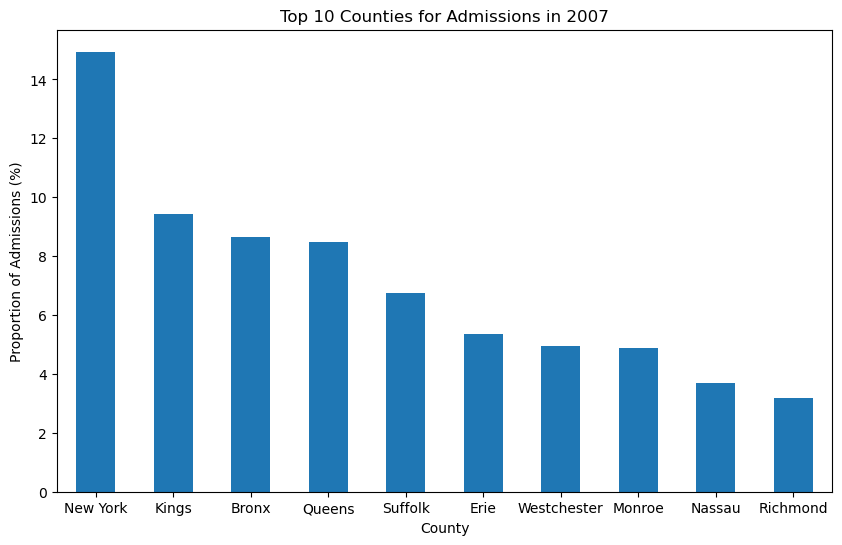

In [13]:
annualAdmissionsByCounty(2007)

In [14]:
# A trend I notice is that the highest proportions
# are located in NYC counties notably Manhattan the city itself
# This can be explained by the population density
# And the ease of being able to obtain substances in these areas.

## Question 6: 
Filter the data, and extract all admissions to the various “Rehab” facilities; i.e. you should perform a case-insensitive match for all facilities that include the word rehab, rehabilitation, etc. Using the filtered data, identify which substance is the most prominent among each age group. Visualize and explain the results.

In [15]:
# Filter the data for facilities containing the word "rehab" in a case-insensitive manner
rehab_facilities = df[df['Service Type'].str.contains('rehab', case=False)]

# Group by age group and primary substance group, and calculate the count of admissions
age_substance_counts = rehab_facilities.groupby(['Age Group', 'Primary Substance Group'])['Admissions'].sum()

# Find the most prominent substance for each age group
most_prominent_substances = age_substance_counts.groupby('Age Group').idxmax().reset_index()
most_prominent_substances.columns = ['Age Group', 'Most Prominent Substance']

print(age_substance_counts)
print(most_prominent_substances)

Age Group      Primary Substance Group
18 through 24  Alcohol                     16363
               All Others                   5849
               Cocaine                      6970
               Heroin                      31583
               Marijuana                   21545
               Other Opioids               11099
25 through 34  Alcohol                     53483
               All Others                  13148
               Cocaine                     24796
               Heroin                      67720
               Marijuana                   19357
               Other Opioids               17075
35 through 44  Alcohol                     78199
               All Others                   8197
               Cocaine                     34543
               Heroin                      37869
               Marijuana                    9359
               Other Opioids                7542
45 through 54  Alcohol                    104903
               All Others     

In [16]:
# The trend is that older generations are admitted more for alcohol.
# Due to maybe how established alcohol is and how long its been around.
# Slightly younger groups are admitted more for heroin possiblly because
# it is newer and thus more popular among younger people.
# For adolescents and minors it is Marijuana because they shouldn't
# have means to obtain alcohol or heroin as likely as weed.

## Question 7: 
Using the filtered “rehab” data from question 6 above, identify any patterns in the admission to rehab facilities in any 5 counties and substance groups. Explain your observations.

In [17]:
# 5 counties of NYC and their data
new_york_data = rehab_facilities[rehab_facilities['County of Program Location'] == 'New York']
kings_data = rehab_facilities[rehab_facilities['County of Program Location'] == 'Kings']
queens_data = rehab_facilities[rehab_facilities['County of Program Location'] == 'Queens']
bronx_data = rehab_facilities[rehab_facilities['County of Program Location'] == 'Bronx']
richmond_data = rehab_facilities[rehab_facilities['County of Program Location'] == 'Richmond']

# Function to create bar graph for total admissions by substance group
def admissions_per_substance(data, county_name):
    # Group data by substance group and calculate total admissions
    grouped_data = data.groupby('Primary Substance Group')['Admissions'].sum().reset_index()

    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(grouped_data['Primary Substance Group'], grouped_data['Admissions'])
    plt.title(f'Total Admissions by Substance Group in {county_name} County')
    plt.xlabel('Substance Group')
    plt.ylabel('Total Admissions')
    plt.xticks(rotation=45)
    plt.show()

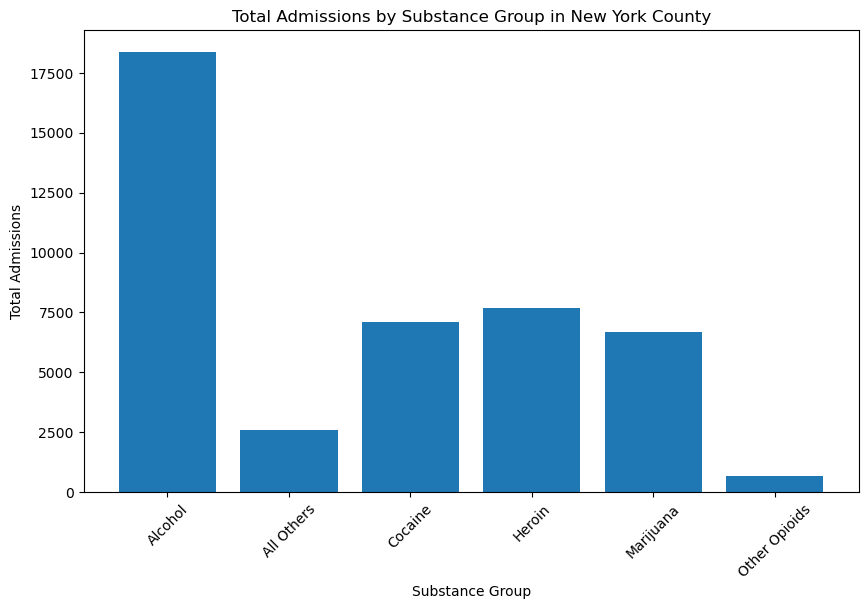

In [18]:
admissions_per_substance(new_york_data, 'New York')

In [19]:
# Admissions for alcohol is significantly higher than all other substances
# Cocaine, heroin, and marijuana are closely tied together
# All other opioids and substances do not compare to these big 4
# Noticably across all 5 counties in NYC these are the largest substances that are abused.

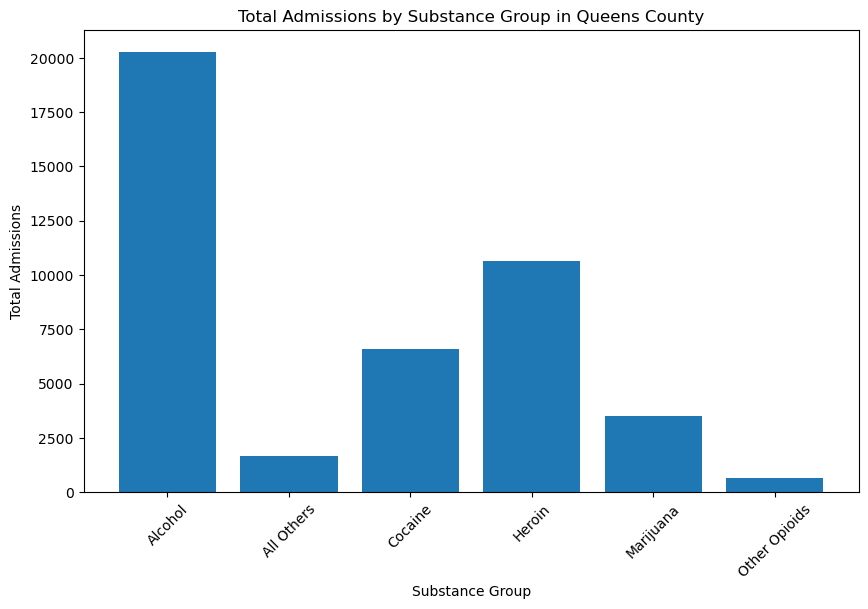

In [20]:
admissions_per_substance(queens_data, 'Queens')

In [21]:
# Same as Manhattan alcohol beats all other substances by a long shot.
# However, there seems to be a lot more heroin usage and lower marijuana usage.
# Cocaine usage is consistent. Explanation for marijuana could be that since
# it is used more by younger populations, who like to hang out in the city,
# it ends up being lower in Queens and higher in Manhattan.

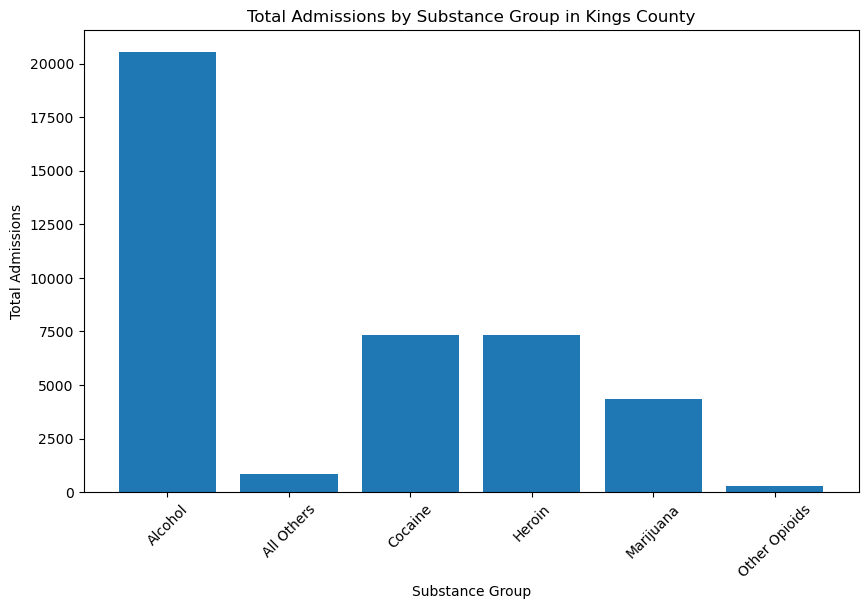

In [22]:
admissions_per_substance(kings_data, 'Kings')

In [23]:
# Prevailing trend that Alcohol is significantly used more than other substances.
# Marijuana is however lower than cocaine and heroin which can following the theory
# of Queens where the minors are more apparent in Manhattan.
# However since, Queens is much more suburban than Brooklyn, that may explain the higher usage
# of heroin which is a street drug.

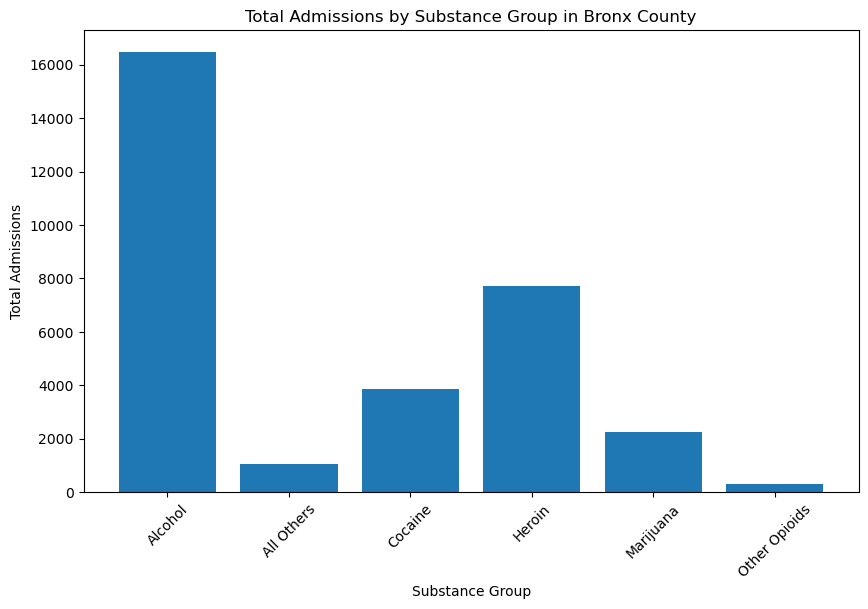

In [24]:
admissions_per_substance(bronx_data, 'Bronx')

In [25]:
# Once again, the prevailing trend of alcohol being the highest abused substance.
# However, heroin usage is signifantly higher than cocaine and marijuana.
# This can be explained as to the fact that the Bronx is a more ghetto borough in NYC,
# explaning how the street drug heroin is much more common.

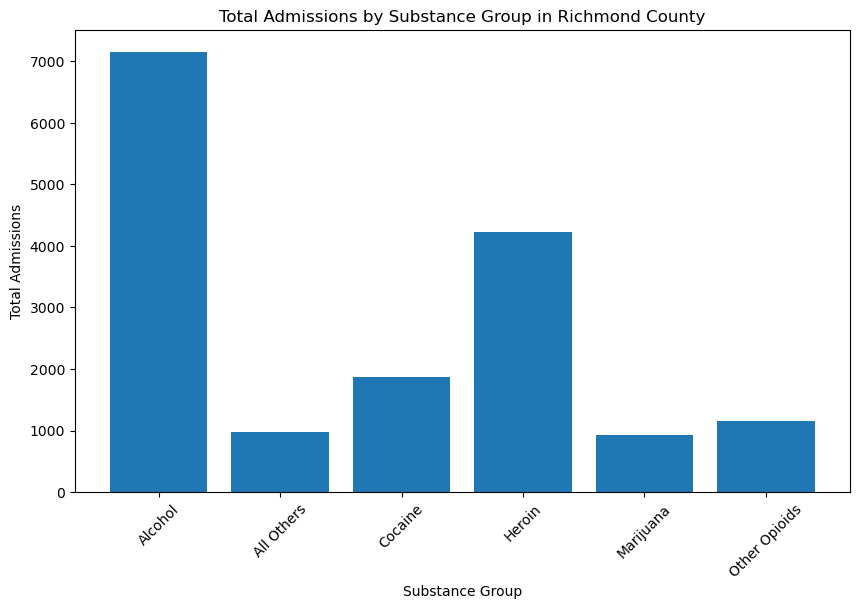

In [26]:
admissions_per_substance(richmond_data, 'Richmond')

In [27]:
# In general, compared to the other boroughs Staten Island is just in general
# a lot lower across the board. But alcohol is still the highest prevailing substance.
# Heroin, cocaine, and marijuana is very comparable to the distribution in Bronx
# which is very suprising.

## Question 8: 
Create any (1) visualization of your choice to demonstrate something interesting about the data. Ensure that you explain what you will demonstrate and the results.

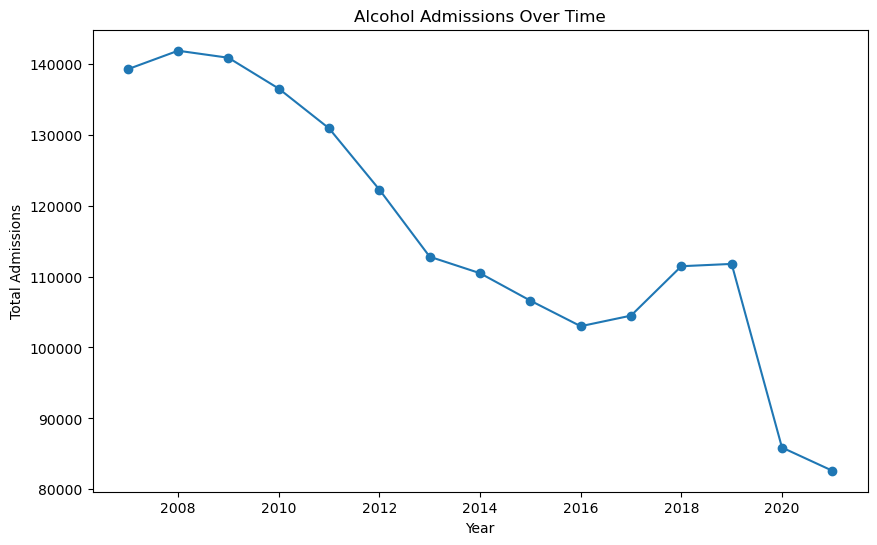

In [28]:
# Filter the data for admissions related to alcohol
alcohol_data = df[df['Primary Substance Group'] == 'Alcohol']

# Group the filtered data by year and calculate total admissions for each year
yearly_admissions = alcohol_data.groupby('Year')['Admissions'].sum()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(yearly_admissions.index, yearly_admissions.values, marker='o', linestyle='-')
plt.title('Alcohol Admissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Admissions')
plt.show()

In [29]:
# At the beginning alcohol is very prevalent in admissions.
# However, compared to total annual admissions, the trends
# of alcohol drop a lot faster. This can be dude to a combination
# of dropping annual admissions which we saw previously coupled with
# the uprising of other drugs that become more popular with younger generations
# (which we alsos saw previously).

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
